# Computer Vision Demo

This workbook walks through...

Import dependencies.

In [14]:
import torch
from torch import nn
from torch.optim.sgd import SGD

%load_ext autoreload
%autoreload 1
%aimport config
%aimport src.data
%aimport src.model
%aimport src.pipeline

DEVICE = config.DEVICE # type: ignore
Data = src.data.Data # type: ignore
NeuralNetwork = src.model.NeuralNetwork # type: ignore
Pipeline = src.pipeline.Pipeline # type: ignore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Visualize our dataset.

Source: https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/xaoz/workspace/cv_demo/data
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /home/xaoz/workspace/cv_demo/data
    Split: Test
    StandardTransform
Transform: ToTensor()

Feature batch shape: torch.Size([32, 1, 28, 28])

Labels batch shape: torch.Size([32])

Classes: ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

First batch examples in image below.


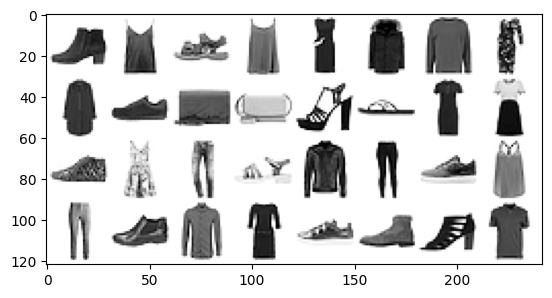

In [15]:
data = Data()
data.get_data()
data.inspect_data()

Prepare our model, loss function, optimizer and training pipeline.

In [16]:
model = NeuralNetwork().to(DEVICE)

loss_fn = nn.CrossEntropyLoss()

optimizer = SGD(model.parameters(), lr=1e-3)

pipeline = Pipeline(data, model, loss_fn, optimizer)


Train and evaluate the model.

In [17]:

pipeline.process(epochs=5)

model.eval()
x, y = data.test.dataset[0][0], data.test.dataset[0][1]
with torch.no_grad():
    x = x.to(DEVICE)
    pred = model(x)
    predicted, actual = data.classes[pred[0].argmax(0)], data.classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Epoch 1
-------------------------------
loss: 2.304436  [   32/60000]
loss: 2.295556  [ 3232/60000]
loss: 2.261540  [ 6432/60000]
loss: 2.245066  [ 9632/60000]
loss: 2.257298  [12832/60000]
loss: 2.225933  [16032/60000]
loss: 2.193673  [19232/60000]
loss: 2.196791  [22432/60000]
loss: 2.181440  [25632/60000]
loss: 2.150539  [28832/60000]
loss: 2.127562  [32032/60000]
loss: 2.068121  [35232/60000]
loss: 2.090598  [38432/60000]
loss: 2.084886  [41632/60000]
loss: 2.033215  [44832/60000]
loss: 1.952762  [48032/60000]
loss: 1.907016  [51232/60000]
loss: 1.901759  [54432/60000]
loss: 2.003250  [57632/60000]
Test Error: 
 Accuracy: 61.3%, Avg loss: 1.858143 

Epoch 2
-------------------------------
loss: 1.864781  [   32/60000]
loss: 1.842182  [ 3232/60000]
loss: 1.821823  [ 6432/60000]
loss: 1.766667  [ 9632/60000]
loss: 1.742217  [12832/60000]
loss: 1.673173  [16032/60000]
loss: 1.686237  [19232/60000]
loss: 1.485090  [22432/60000]
loss: 1.505836  [25632/60000]
loss: 1.620046  [28832/60000